Carga de librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Datos

Funciones para transformar los datos

In [25]:
import numpy as np

def aplanar(datos, cantidad=10):
  datos = np.split(datos, cantidad)
  return np.array([ejem.flatten(order='C') for ejem in datos])

def des_aplanar(datos, k=7, j=5):
  datos = np.array(datos)
  return np.array([ejem.reshape((k, j), order='C') for ejem in datos])

def binario_a_matriz(datos):
  matrices = []
  for caracter in datos:
    matriz = []
    for byte in caracter:
      fila = [(byte >> i) & 1 for i in range(4, -1, -1)]
      matriz.append(fila)
    matrices.append(matriz)
  return np.array(matrices)

def graficar_matrices(mats, titulo=""):
  n = len(mats)
  fig, axes = plt.subplots(1, n, figsize=(n * 2, 3))
  if n == 1:          # cuando n = 1, axes no es lista
    axes = [axes]

  for i, ax in enumerate(axes):
    ax.imshow(mats[i], cmap="gray_r", interpolation="nearest")  # 1→negro
    ax.axis("off")
    ax.set_title(f"Gen {i+1}")

  if titulo:
    fig.suptitle(titulo, fontsize=12, y=1.05)
  plt.tight_layout()
  plt.show()

Transformación de los datos

In [26]:
datos = [
    [0x0e, 0x11, 0x17, 0x15, 0x17, 0x10, 0x0f],  # @
    [0x04, 0x0a, 0x11, 0x11, 0x1f, 0x11, 0x11],  # A
    [0x1e, 0x11, 0x11, 0x1e, 0x11, 0x11, 0x1e],  # B
    [0x0e, 0x11, 0x10, 0x10, 0x10, 0x11, 0x0e],  # C
    [0x1e, 0x09, 0x09, 0x09, 0x09, 0x09, 0x1e],  # D
    [0x1f, 0x10, 0x10, 0x1c, 0x10, 0x10, 0x1f],  # E
    [0x1f, 0x10, 0x10, 0x1f, 0x10, 0x10, 0x10],  # F
    [0x0e, 0x11, 0x10, 0x10, 0x13, 0x11, 0x0f],  # G
    [0x11, 0x11, 0x11, 0x1f, 0x11, 0x11, 0x11],  # H
    [0x0e, 0x04, 0x04, 0x04, 0x04, 0x04, 0x0e],  # I
    [0x1f, 0x02, 0x02, 0x02, 0x02, 0x12, 0x0c],  # J
    [0x11, 0x12, 0x14, 0x18, 0x14, 0x12, 0x11],  # K
    [0x10, 0x10, 0x10, 0x10, 0x10, 0x10, 0x1f],  # L
    [0x11, 0x1b, 0x15, 0x11, 0x11, 0x11, 0x11],  # M
    [0x11, 0x11, 0x19, 0x15, 0x13, 0x11, 0x11],  # N
    [0x0e, 0x11, 0x11, 0x11, 0x11, 0x11, 0x0e],  # O
    [0x1e, 0x11, 0x11, 0x1e, 0x10, 0x10, 0x10],  # P
    [0x0e, 0x11, 0x11, 0x11, 0x15, 0x12, 0x0d],  # Q
    [0x1e, 0x11, 0x11, 0x1e, 0x14, 0x12, 0x11],  # R
    [0x0e, 0x11, 0x10, 0x0e, 0x01, 0x11, 0x0e],  # S
    [0x1f, 0x04, 0x04, 0x04, 0x04, 0x04, 0x04],  # T
    [0x11, 0x11, 0x11, 0x11, 0x11, 0x11, 0x0e],  # U
    [0x11, 0x11, 0x11, 0x11, 0x11, 0x0a, 0x04],  # V
    [0x11, 0x11, 0x11, 0x15, 0x15, 0x1b, 0x11],  # W
    [0x11, 0x11, 0x0a, 0x04, 0x0a, 0x11, 0x11],  # X
    [0x11, 0x11, 0x0a, 0x04, 0x04, 0x04, 0x04],  # Y
    [0x1f, 0x01, 0x02, 0x04, 0x08, 0x10, 0x1f],  # Z
    [0x0e, 0x08, 0x08, 0x08, 0x08, 0x08, 0x0e],  # [
    [0x10, 0x10, 0x08, 0x04, 0x02, 0x01, 0x01],  # \
    [0x0e, 0x02, 0x02, 0x02, 0x02, 0x02, 0x0e],  # ]
    [0x04, 0x0a, 0x11, 0x00, 0x00, 0x00, 0x00],  # ^
    [0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x1f],  # _
]

etiquetas = ['@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_']

matrices = binario_a_matriz(datos)

x = aplanar(matrices, len(matrices)) # Datos enchorizados

In [121]:
import json

# Guardar en un archivo JSON
with open("datos_aplanados.json", "w") as f:
    json.dump(x.tolist(), f)

# Modelos

Funciones auxiliares

In [6]:
def signo(h):
  return 1 if h >= 0 else -1

def sigmoide(h, β=1):
  return 1 / (1 + np.exp(-2 * β * h))

def sigmoide_derivada(h, β=1):
  return 2 * β * sigmoide(h, β) * (1 - sigmoide(h, β))

def tanh(h, β=1): # Usarlo
  return np.tanh(β * h)

def tanh_derivada(h, β=1):
  return β * (1 - tanh(h, β) ** 2)

def gelu(h):
  return 0.5 * h * (1 + np.tanh(np.sqrt(2 / np.pi) * (h + 0.044715 * h**3)))

def gelu_derivada(h):
  c = np.sqrt(2 / np.pi)
  a = h + 0.044715 * h**3
  t = tanh(c * a)
  dt = tanh_derivada(c * a) * c * (1 + 3 * 0.044715 * h**2)
  return 0.5 * (1 + t) + 0.5 * h * dt

def binary_crossentropy(y, ypred):
  ε = 1e-8  # evitar log(0)
  return -np.mean(y * np.log(ypred + ε) + (1 - y) * np.log(1 - ypred + ε))

def MSE(y, ypred):
  return 1/2 * np.sum((y - ypred)**2)

Modelo autoencoder

In [12]:
def autoencoder(x, y, η, epocas):
  np.random.seed(11)

  # Cantidad de neuronas
  entrada = salida = int(x.shape[1]) # Igual que salida
  oculta1 = oculta2 = 11 # Ambas del mismo tamaño
  latente = 2

  # Creo mis pesos
  w1 = np.random.normal(0, 0.1, (entrada, oculta1))
  w2 = np.random.normal(0, 0.1, (oculta1, latente))
  w3 = np.random.normal(0, 0.1, (latente, oculta2))
  w4 = np.random.normal(0, 0.1, (oculta2, salida))

  # Creo mis sesgos
  b1 = np.zeros((1, oculta1))
  b2 = np.zeros((1, latente))
  b3 = np.zeros((1, oculta2))
  b4 = np.zeros((1, salida))

  error = np.inf
  error_min = np.inf
  errores = []

  for _ in range(epocas):
    indices = np.random.permutation(x.shape[0])

    for indice in indices:
      Vk = x[indice].reshape(1, -1)
      yk = y[indice].reshape(1, -1)

      # Propagar
      h1 = Vk @ w1 + b1
      V1 = sigmoide(h1)

      h2 = V1 @ w2 + b2
      V2 = sigmoide(h2)

      h3 = V2 @ w3 + b3
      V3 = sigmoide(h3)

      h4 = V3 @ w4 + b4
      V4 = sigmoide(h4)

      # Retropropagar
      δ4 = sigmoide_derivada(h4) * (yk - V4)
      δ3 = sigmoide_derivada(h3) * (δ4 @ w4.T)
      δ2 = sigmoide_derivada(h2) * (δ3 @ w3.T)
      δ1 = sigmoide_derivada(h1) * (δ2 @ w2.T)

      # Actualización de pesos y sesgos
      w4 += η * (V3.T @ δ4)
      b4 += η * δ4

      w3 += η * (V2.T @ δ3)
      b3 += η * δ3

      w2 += η * (V1.T @ δ2)
      b2 += η * δ2

      w1 += η * (Vk.T @ δ1)
      b1 += η * δ1

      #Calculo de error
      #error = binary_crossentropy(yk, V4)
      error = MSE(yk, V4)

      if error < error_min:
        error_min = error
        w1_min, w2_min, w3_min, w4_min = w1.copy(), w2.copy(), w3.copy(), w4.copy()
        b1_min, b2_min, b3_min, b4_min = b1.copy(), b2.copy(), b3.copy(), b4.copy()

    errores.append(error_min)

  print(f"Entrenamiento realizado con {epocas} epocas y error mínimo alcanzado: {error_min}")
  plt.plot(errores)
  plt.title("Error por época")
  plt.xlabel("Época")
  plt.ylabel("Error")
  plt.grid()
  plt.show()
  return w1_min, w2_min, w3_min, w4_min, b1_min, b2_min, b3_min, b4_min

def predecir_autoencoder(Vk, w1, w2, w3, w4, b1, b2, b3, b4):
  V1 = sigmoide(Vk @ w1 + b1)
  V2 = sigmoide(V1 @ w2 + b2)
  V3 = sigmoide(V2 @ w3 + b3)
  V4 = sigmoide(V3 @ w4 + b4)
  return V4

In [53]:
def autoencoder2(x, y, η, epocas, β1=0.9, β2=0.999, ε=1e-8):
    np.random.seed(11)

    entrada = salida = int(x.shape[1])
    oculta1 = oculta2 = 11
    latente = 2

    # Pesos y sesgos
    w1 = np.random.normal(0, 0.1, (entrada, oculta1))
    w2 = np.random.normal(0, 0.1, (oculta1, latente))
    w3 = np.random.normal(0, 0.1, (latente, oculta2))
    w4 = np.random.normal(0, 0.1, (oculta2, salida))

    b1 = np.zeros((1, oculta1))
    b2 = np.zeros((1, latente))
    b3 = np.zeros((1, oculta2))
    b4 = np.zeros((1, salida))

    # Inicialización para Adam
    mw, vw = [np.zeros_like(w) for w in [w1, w2, w3, w4]], [np.zeros_like(w) for w in [w1, w2, w3, w4]]
    mb, vb = [np.zeros_like(b) for b in [b1, b2, b3, b4]], [np.zeros_like(b) for b in [b1, b2, b3, b4]]

    t = 0
    error_min = np.inf
    errores = []

    for _ in range(epocas):
        indices = np.random.permutation(x.shape[0])

        for indice in indices:
            t += 1
            Vk = x[indice].reshape(1, -1)
            yk = y[indice].reshape(1, -1)

            # Forward
            h1 = Vk @ w1 + b1
            V1 = sigmoide(h1)

            h2 = V1 @ w2 + b2
            V2 = sigmoide(h2)

            h3 = V2 @ w3 + b3
            V3 = sigmoide(h3)

            h4 = V3 @ w4 + b4
            V4 = sigmoide(h4)

            # Backprop
            δ4 = sigmoide_derivada(h4) * (yk - V4)
            δ3 = sigmoide_derivada(h3) * (δ4 @ w4.T)
            δ2 = sigmoide_derivada(h2) * (δ3 @ w3.T)
            δ1 = sigmoide_derivada(h1) * (δ2 @ w2.T)

            # Gradientes
            dw = [Vk.T @ δ1, V1.T @ δ2, V2.T @ δ3, V3.T @ δ4]
            db = [δ1, δ2, δ3, δ4]

            # Adam para pesos y sesgos
            for i, (dw_i, db_i) in enumerate(zip(dw, db)):
                # Pesos
                mw[i] = β1 * mw[i] + (1 - β1) * dw_i
                vw[i] = β2 * vw[i] + (1 - β2) * (dw_i ** 2)

                mw_hat = mw[i] / (1 - β1 ** t)
                vw_hat = vw[i] / (1 - β2 ** t)

                [w1, w2, w3, w4][i] += η * mw_hat / (np.sqrt(vw_hat) + ε)

                # Sesgos
                mb[i] = β1 * mb[i] + (1 - β1) * db_i
                vb[i] = β2 * vb[i] + (1 - β2) * (db_i ** 2)

                mb_hat = mb[i] / (1 - β1 ** t)
                vb_hat = vb[i] / (1 - β2 ** t)

                [b1, b2, b3, b4][i] += η * mb_hat / (np.sqrt(vb_hat) + ε)

            # Error
            error = binary_crossentropy(yk, V4)

            if error < error_min:
                error_min = error
                w1_min, w2_min, w3_min, w4_min = w1.copy(), w2.copy(), w3.copy(), w4.copy()
                b1_min, b2_min, b3_min, b4_min = b1.copy(), b2.copy(), b3.copy(), b4.copy()

        errores.append(error_min)

    print(f"Entrenamiento realizado con {epocas} epocas y error mínimo alcanzado: {error_min}")
    plt.plot(errores)
    plt.title("Error por época")
    plt.xlabel("Época")
    plt.ylabel("Error")
    plt.grid()
    plt.show()

    return w1_min, w2_min, w3_min, w4_min, b1_min, b2_min, b3_min, b4_min

def predecir_autoencoder2(Vk, w1, w2, w3, w4, b1, b2, b3, b4):
    V1 = sigmoide(Vk @ w1 + b1)
    V2 = sigmoide(V1 @ w2 + b2)
    V3 = sigmoide(V2 @ w3 + b3)
    V4 = sigmoide(V3 @ w4 + b4)
    return V4

Encoder y decoder

In [40]:
def encoder(Vk, w1, w2, b1, b2):
  V1 = sigmoide(Vk @ w1 + b1)
  V2 = sigmoide(V1 @ w2 + b2)
  return V2

def decoder(V_latente, w3, w4, b3, b4):
  V3 = sigmoide(V_latente @ w3 + b3)
  V4 = sigmoide(V3 @ w4 + b4)
  return V4

# Pruebas autoencoder

Prueba autoencoder y guardar pesos

Entrenamiento realizado con 20000 epocas y error mínimo alcanzado: 0.013117072420079019


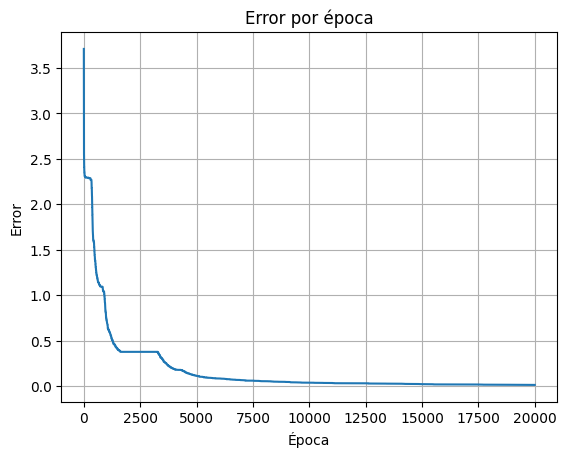

In [30]:
w1, w2, w3, w4, b1, b2, b3, b4 = autoencoder(x, x, 0.01, 20000)

Entrenamiento realizado con 50000 epocas y error mínimo alcanzado: 7.295279668433591e-05


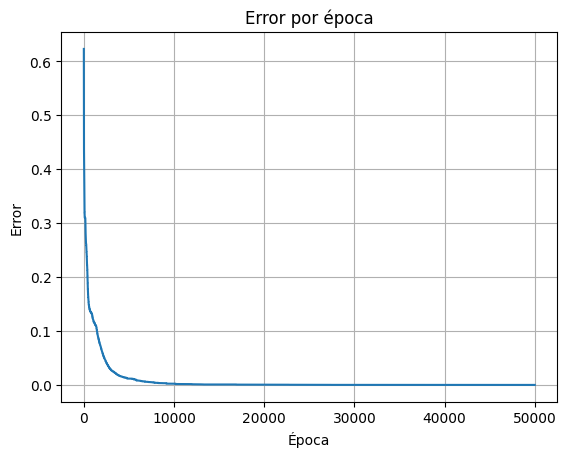

In [66]:
w1, w2, w3, w4, b1, b2, b3, b4 = autoencoder2(x, x, 0.001, 50000)

Guardar pesos

In [68]:
pesos_a_guardar = np.array([w1, w2, w3, w4, b1, b2, b3, b4], dtype=object)
np.save("pesos_autoencoder.npy", pesos_a_guardar, allow_pickle=True)

Cargar pesos

In [117]:
pesos = np.load("pesos_autoencoder.npy", allow_pickle=True)
w1, w2, w3, w4, b1, b2, b3, b4 = pesos

Predicciones

[0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1]
[0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1]


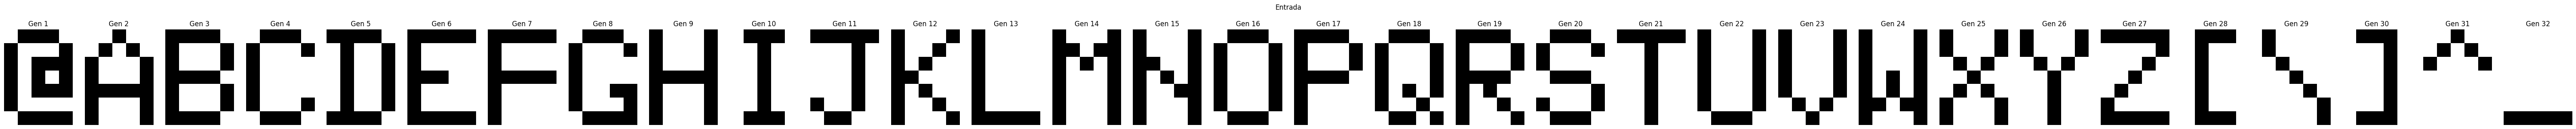

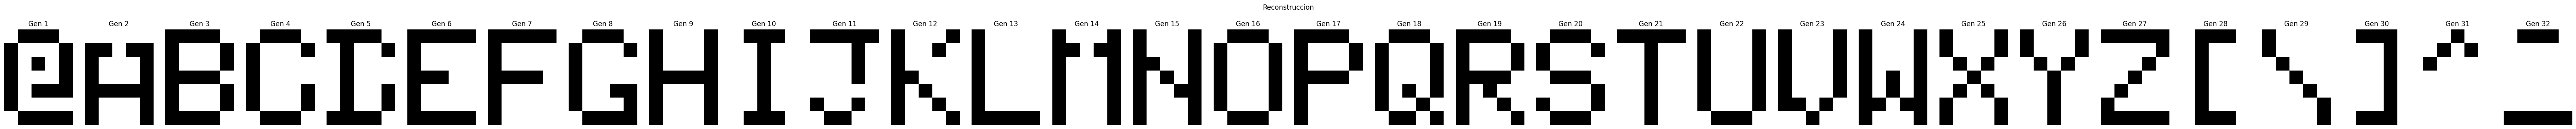

In [70]:
# Realizamos las predicciones y las redondeamos
ypred = predecir_autoencoder(x, w1, w2, w3, w4, b1, b2, b3, b4)
#ypred = predecir_autoencoder2(x, w1, w2, w3, w4, w5, w6, b1, b2, b3, b4, b5, b6)
reconstruccion = np.round(ypred).astype(int)

# Comparamos alguna
print(reconstruccion[1])
print(x[1])

# Las reconstruimos y graficamos el antes y después
graficar_matrices(des_aplanar(x, 7, 5), "Entrada")
matriz_nueva2 = des_aplanar(reconstruccion, 7, 5)
graficar_matrices(matriz_nueva2, "Reconstruccion")

# Pruebas Encoder

Función para graficar capa latente

In [38]:
def graficar_capa_latente(codificados, etiquetas, fontsize=12, fcolor='black'):
  plt.figure(figsize=(10,8))
  plt.scatter(codificados[:,0], codificados[:,1], color='white')

  for i, etiqueta in enumerate(etiquetas):
      x1, y1 = codificados[i, 0], codificados[i, 1]
      texto = plt.text(x1, y1, etiqueta, fontsize=fontsize, ha='center', va='center', color='white')
      texto.set_path_effects([
          path_effects.Stroke(linewidth=(int(fontsize/8)), foreground=fcolor),  # contorno negro
          path_effects.Normal()  # texto original encima
      ])

  #plt.title('Representaciones latentes con contorno en las etiquetas')
  # Si se usa referencia el gráfico no debe tener titulo
  plt.grid(True)
  plt.xlim(-0.05, 1.05)
  plt.ylim(-0.05, 1.05)
  plt.show()

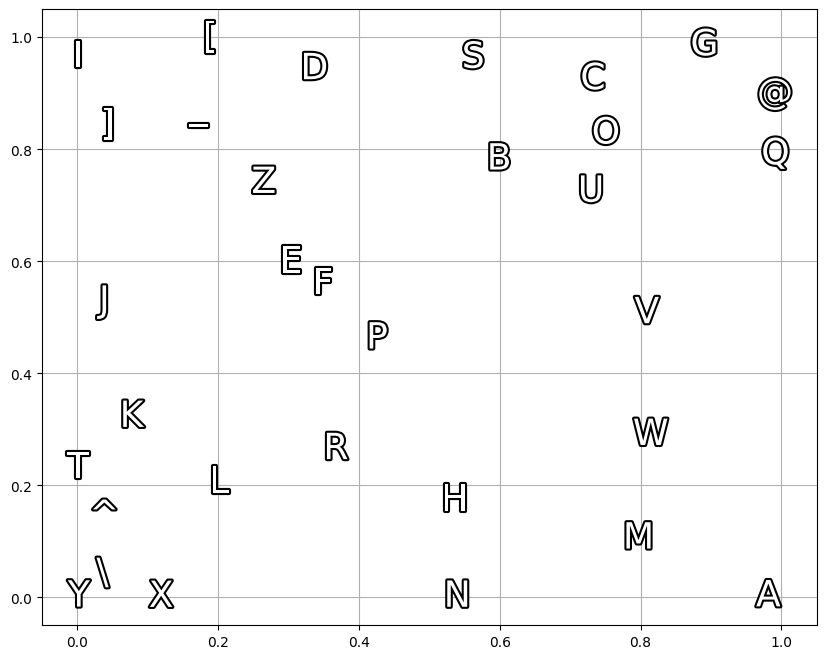

In [71]:
codificados1 = encoder(x, w1, w2, b1, b2)

graficar_capa_latente(codificados1, etiquetas, 26)

[EXTRA] json

In [75]:
import json

codificados_puntos = np.round(codificados1, 2)

codificados_redondeados = [[round(x, 2) for x in par] for par in codificados_puntos.tolist()]

print(etiquetas)
print(json.dumps(codificados_redondeados))

['@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_']
[[0.99, 0.9], [0.98, 0.0], [0.6, 0.78], [0.73, 0.93], [0.34, 0.94], [0.3, 0.6], [0.35, 0.56], [0.89, 0.99], [0.54, 0.17], [0.0, 0.96], [0.04, 0.53], [0.08, 0.32], [0.2, 0.2], [0.8, 0.1], [0.54, 0.0], [0.75, 0.83], [0.43, 0.46], [0.99, 0.79], [0.37, 0.26], [0.56, 0.96], [0.0, 0.23], [0.73, 0.72], [0.81, 0.51], [0.81, 0.29], [0.12, 0.0], [0.0, 0.0], [0.27, 0.74], [0.19, 1.0], [0.04, 0.04], [0.04, 0.84], [0.04, 0.15], [0.17, 0.87]]


# Pruebas Decoder

Función para "crear" puntos entre letras

In [43]:
#etiquetas.index("T")

def representar_promedio_entre(codificados, etiquetas, punto1, punto2):
  valor1 = codificados[etiquetas.index(punto1)]
  valor2 = codificados[etiquetas.index(punto2)]
  nuevo_valor = (valor1 + valor2) / 2

  decodificado = decoder(nuevo_valor, w3, w4, b3, b4)
  decodificado = np.round(decodificado).astype(int)

  matriz_decodificado = des_aplanar(decodificado, 7, 5)
  

  graficar_matrices(matriz_decodificado, titulo=f"{punto1} + {punto2}  →  punto medio")

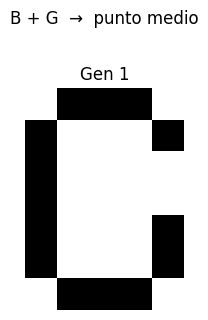

In [74]:
representar_promedio_entre(codificados1, etiquetas, "B", "G")

# Modelo eliminador de ruido

Función para agregar ruido en las entradas

In [108]:
def agregar_ruido(x, prob=0.02):
  np.random.seed(11)
  x_ruido = x.copy()
  cambios = 0

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      if np.random.rand() < prob:
        cambios += 1
        x_ruido[i, j] = 1 if x[i, j] == 0 else 0
  print(f"Cambios realizados: {cambios}")
  return x_ruido

In [112]:
x_ruido = agregar_ruido(x, 0.02)

Cambios realizados: 16


Ahora entrenemos el modelo utilizando los datos con ruido como entrada

Entrenamiento realizado con 10000 epocas y error mínimo alcanzado: 7.671268290230397e-05


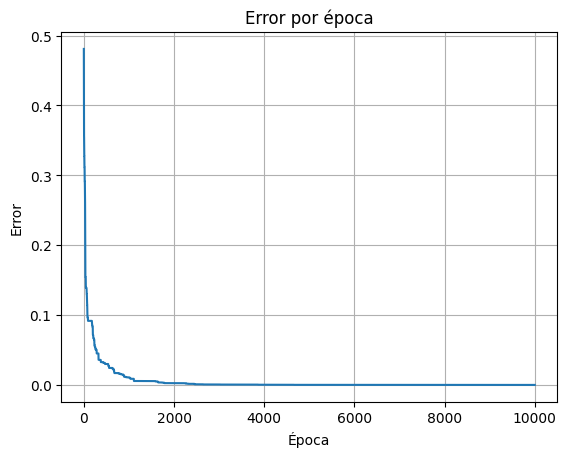

In [113]:
w1a, w2a, w3a, w4a, b1a, b2a, b3a, b4a = autoencoder2(x_ruido, x, 0.01, 10000)

Guardar o cargar modelo

In [114]:
pesos_a_guardar2 = np.array([w1a, w2a, w3a, w4a, b1a, b2a, b3a, b4a], dtype=object)
np.save("pesos_autoencoder_ruido.npy", pesos_a_guardar2, allow_pickle=True)

In [115]:
pesos2 = np.load("pesos_autoencoder_ruido.npy", allow_pickle=True)
w1a, w2a, w3a, w4a, b1a, b2a, b3a, b4a = pesos2

# Pruebas eliminador de ruido

Y ahora probamos como elimina el ruido

[0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1]
[0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1]


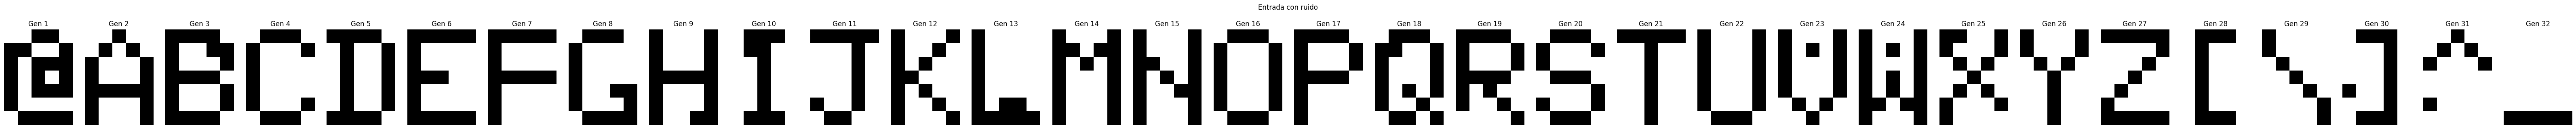

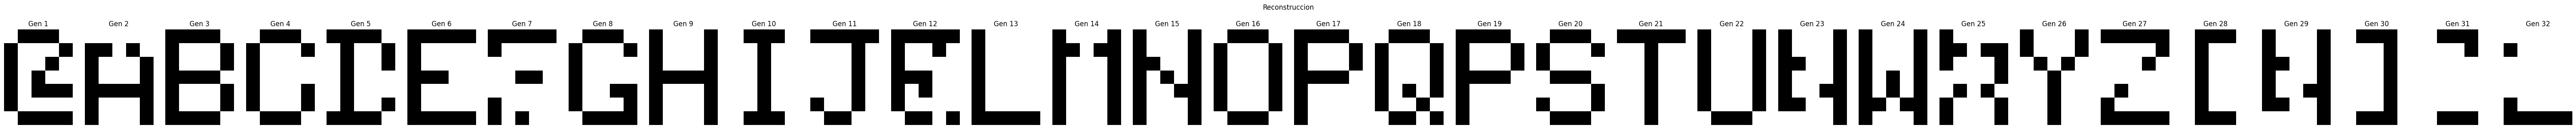

In [116]:
# Realizamos las predicciones y las redondeamos
ypred_ruido = predecir_autoencoder(x_ruido, w1a, w2a, w3a, w4a, b1a, b2a, b3a, b4a)
reconstruccion_ruido = np.round(ypred_ruido).astype(int)

# Comparamos alguna
print(reconstruccion_ruido[1])
print(x[1])

# Las reconstruimos y graficamos el antes y después
graficar_matrices(des_aplanar(x_ruido, 7, 5), "Entrada con ruido")
matriz_nueva2 = des_aplanar(reconstruccion_ruido, 7, 5)
graficar_matrices(matriz_nueva2, "Reconstruccion")

# Guardar JSON de los pesos

In [119]:
import json

# Convertir a listas
pesos_autoencoder = {
    "w1": w1.tolist(), "w2": w2.tolist(), "w3": w3.tolist(), "w4": w4.tolist(),
    "b1": b1.tolist(), "b2": b2.tolist(), "b3": b3.tolist(), "b4": b4.tolist()
}

pesos_ruido = {
    "w1a": w1a.tolist(), "w2a": w2a.tolist(), "w3a": w3a.tolist(), "w4a": w4a.tolist(),
    "b1a": b1a.tolist(), "b2a": b2a.tolist(), "b3a": b3a.tolist(), "b4a": b4a.tolist()
}

# Guardar a archivos JSON
with open("pesos_autoencoder.json", "w") as f:
    json.dump(pesos_autoencoder, f)

with open("pesos_autoencoder_ruido.json", "w") as f:
    json.dump(pesos_ruido, f)
